<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [16]:
#import piplite
#await piplite.install(['numpy'])
#await piplite.install(['pandas'])
#await piplite.install(['seaborn'])

!pip install numpy pandas seaborn
!pip install --upgrade matplotlib

  Using cached matplotlib-3.7.2-cp310-cp310-win_amd64.whl (7.5 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\krish\\anaconda3\\Lib\\site-packages\\matplotlib\\ft2font.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Using cached matplotlib-3.7.2-cp310-cp310-win_amd64.whl (7.5 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\krish\\anaconda3\\Lib\\site-packages\\matplotlib\\ft2font.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [4]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [ ]:
## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [8]:
import pandas as pd
import requests
import io

# Set display options to show more columns and wider output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

response = requests.get(URL)
dataset_part_2_csv = io.BytesIO(response.content)
df = pd.read_csv(dataset_part_2_csv)

df.head(5)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


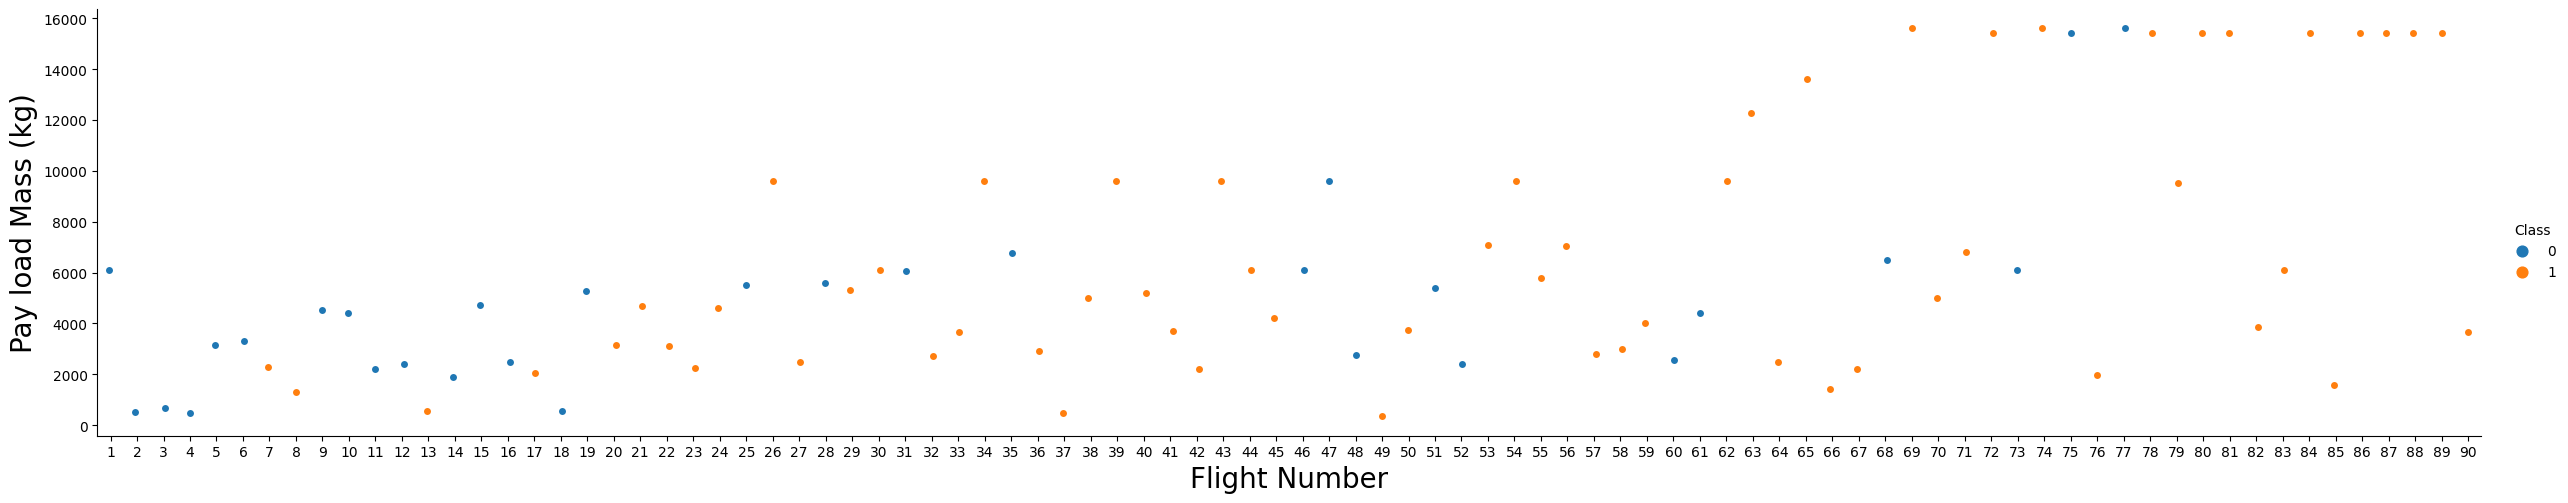

In [9]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


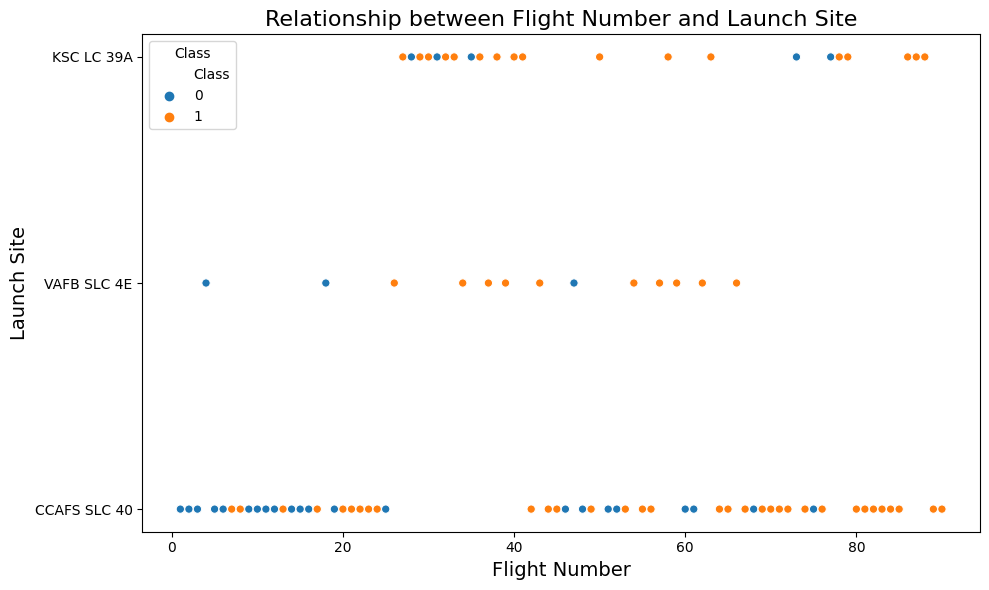

In [18]:
### TASK 1: Visualize the relationship between Flight Number and Launch Site

import pandas as pd
import requests
import io
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Set display options to show more columns and wider output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Suppress all warnings
warnings.filterwarnings("ignore")

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

response = requests.get(URL)
dataset_part_2_csv = io.BytesIO(response.content)
df = pd.read_csv(dataset_part_2_csv)

# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="FlightNumber", y="LaunchSite", hue="Class")

# Customize the labels and legend
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Relationship between Flight Number and Launch Site", fontsize=16)
plt.legend(title="Class")

# Use the traditional tight_layout
plt.tight_layout()
plt.show()



Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


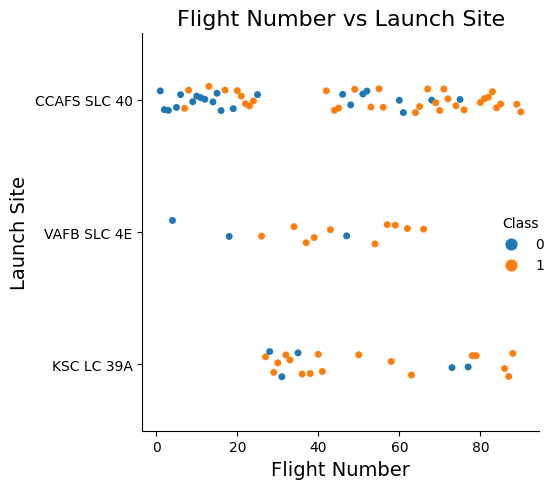

In [19]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
import pandas as pd
import requests
import io
import seaborn as sns
import matplotlib.pyplot as plt

# Set display options to show more columns and wider output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

response = requests.get(URL)
dataset_part_2_csv = io.BytesIO(response.content)
df = pd.read_csv(dataset_part_2_csv)

# Use Seaborn's catplot
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, kind="strip")

# Customize the labels and legend
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Flight Number vs Launch Site", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


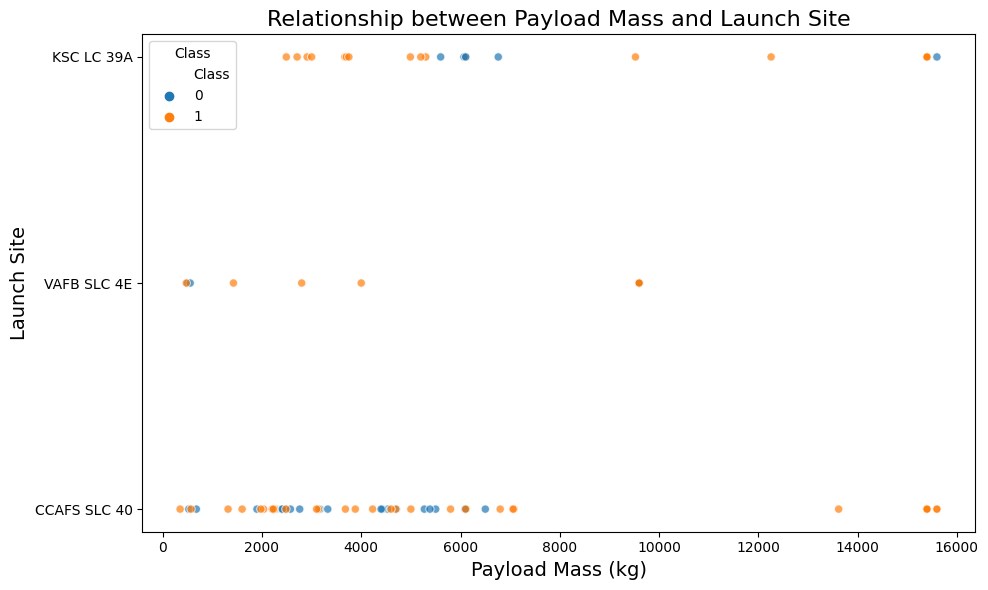

In [20]:
### TASK 2: Visualize the relationship between Payload and Launch Site
# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="PayloadMass", y="LaunchSite", hue="Class", alpha=0.7)

# Customize the labels and legend
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Relationship between Payload Mass and Launch Site", fontsize=16)
plt.legend(title="Class")

# Show the plot
plt.tight_layout()
plt.show()

We also want to observe if there is any relationship between launch sites and their payload mass.


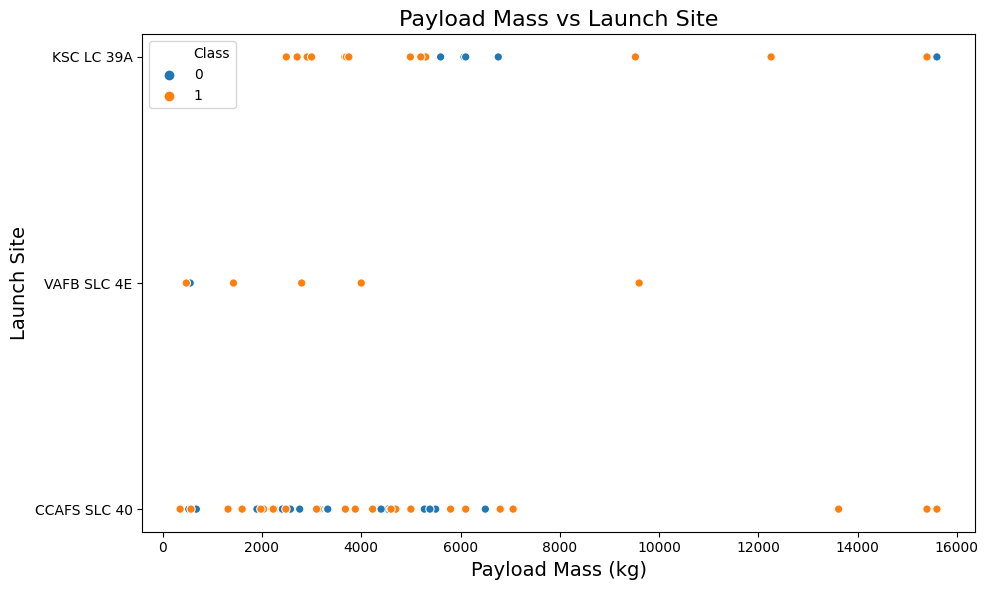

In [21]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="PayloadMass", y="LaunchSite", hue="Class")

# Customize the labels and legend
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Payload Mass vs Launch Site", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


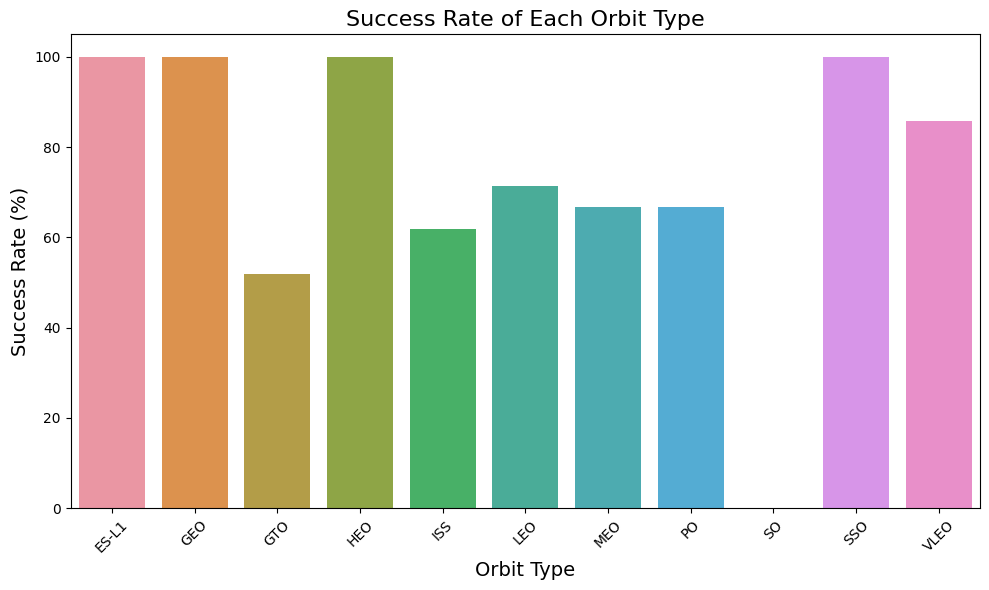

In [26]:
### TASK  3: Visualize the relationship between success rate of each orbit type
# Calculate the success rate for each orbit type
orbit_success_rate = df.groupby("Orbit")["Class"].mean() * 100  # Multiply by 100 to convert to percentage

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=orbit_success_rate.index, y=orbit_success_rate.values)

# Customize the labels
plt.xlabel("Orbit Type", fontsize=14)
plt.ylabel("Success Rate (%)", fontsize=14)
plt.title("Success Rate of Each Orbit Type", fontsize=16)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


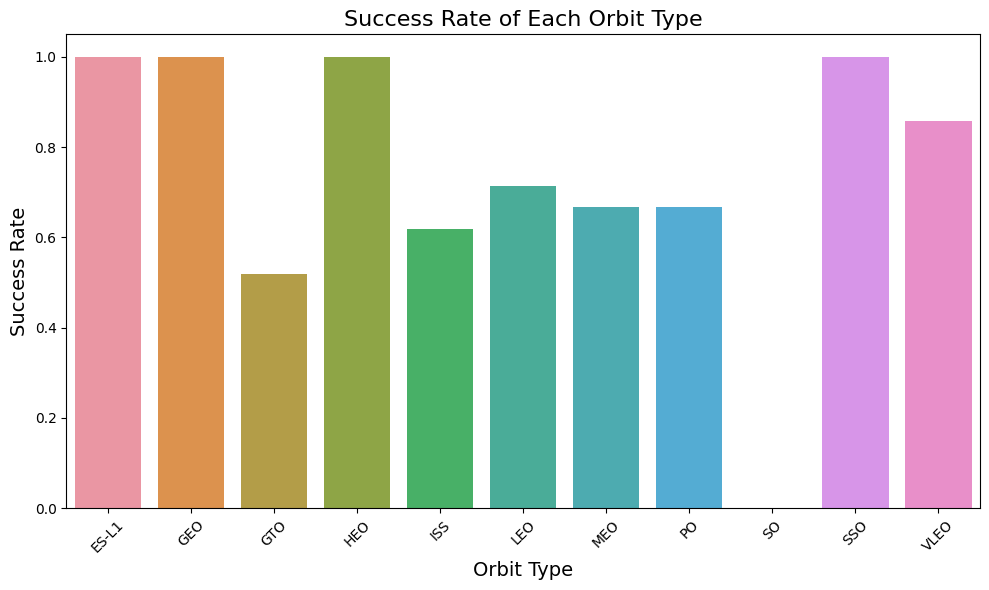

In [24]:
# HINT use groupby method on Orbit column and get the mean of Class column
# Use groupby to calculate the mean success rate for each orbit type
orbit_success_rate = df.groupby("Orbit")["Class"].mean()

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=orbit_success_rate.index, y=orbit_success_rate.values)

# Customize the labels
plt.xlabel("Orbit Type", fontsize=14)
plt.ylabel("Success Rate", fontsize=14)
plt.title("Success Rate of Each Orbit Type", fontsize=16)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

Analyze the ploted bar chart try to find which orbits have high sucess rate.


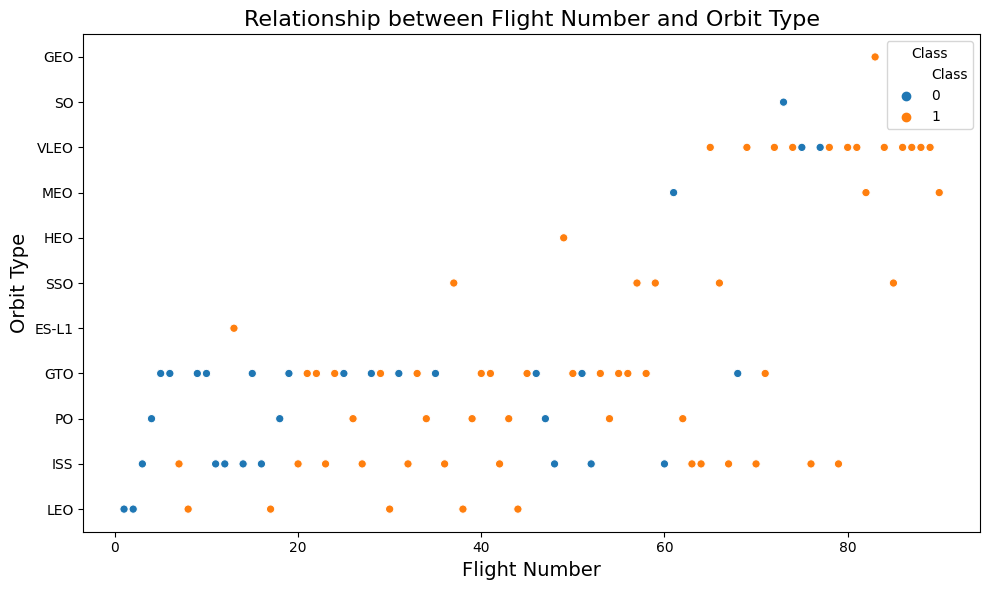

In [27]:
### TASK  4: Visualize the relationship between FlightNumber and Orbit type
# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="FlightNumber", y="Orbit", hue="Class")

# Customize the labels and legend
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Relationship between Flight Number and Orbit Type", fontsize=16)
plt.legend(title="Class")

# Show the plot
plt.tight_layout()
plt.show()

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


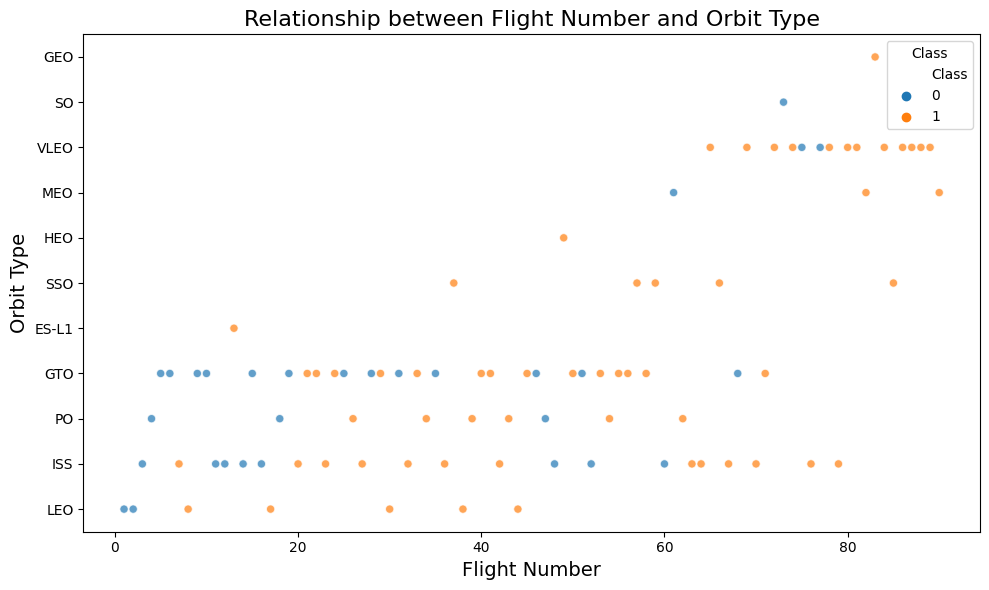

In [28]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="FlightNumber", y="Orbit", hue="Class", alpha=0.7)

# Customize the labels and legend
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Relationship between Flight Number and Orbit Type", fontsize=16)
plt.legend(title="Class")

# Show the plot
plt.tight_layout()
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


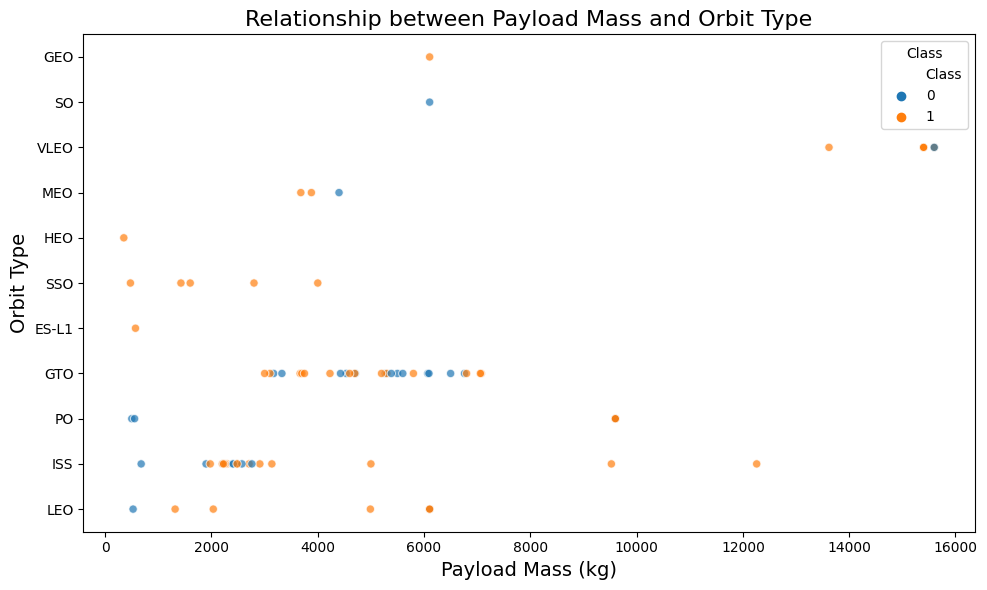

In [29]:
### TASK  5: Visualize the relationship between Payload and Orbit type
# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="PayloadMass", y="Orbit", hue="Class", alpha=0.7)

# Customize the labels and legend
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Relationship between Payload Mass and Orbit Type", fontsize=16)
plt.legend(title="Class")

# Show the plot
plt.tight_layout()
plt.show()

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


In [ ]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


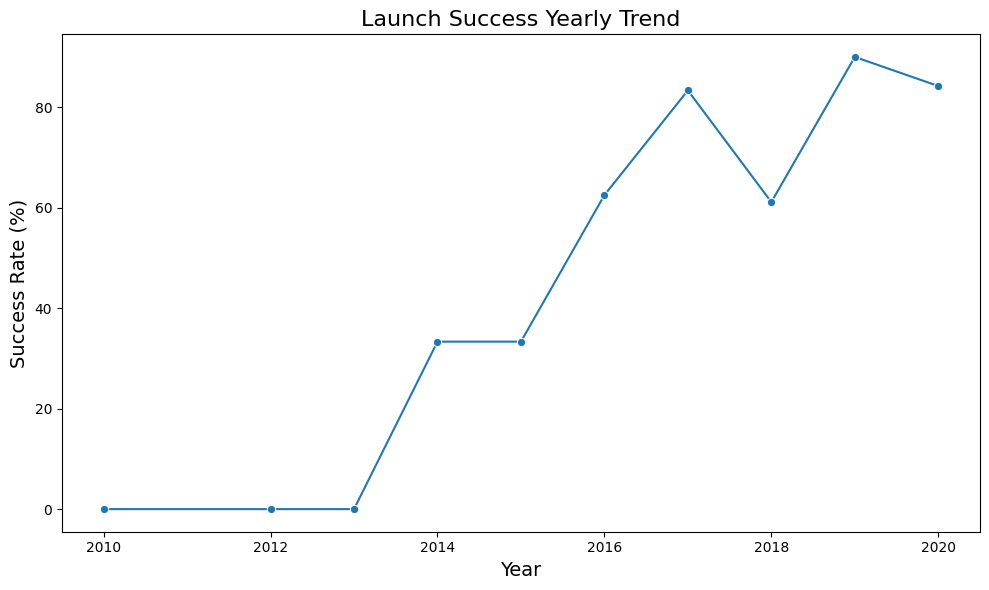

In [30]:
### TASK  6: Visualize the launch success yearly trend
# Extract the year from the Date column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Calculate the success rate for each year
yearly_success_rate = df.groupby("Year")["Class"].mean() * 100

# Create a line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_success_rate.index, y=yearly_success_rate.values, marker='o')

# Customize the labels
plt.xlabel("Year", fontsize=14)
plt.ylabel("Success Rate (%)", fontsize=14)
plt.title("Launch Success Yearly Trend", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [ ]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

In [ ]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate

you can observe that the sucess rate since 2013 kept increasing till 2020


In [31]:
#feature engineering

By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [ ]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

In [34]:
### TASK  7: Create dummy variables to categorical columns
import pandas as pd

# Load the dataset
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(URL)

# Extract specific columns to create the 'features' DataFrame
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]

# List of categorical columns
categorical_columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

# Create dummy variables using pandas
dummy_features = pd.get_dummies(features, columns=categorical_columns, drop_first=True)

# Display the first few rows of the dummy features DataFrame
dummy_features.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [ ]:
# HINT: Use get_dummies() function on the categorical columns

In [35]:
### TASK  8: Cast all numeric columns to `float64`
# Cast numeric columns to float64
numeric_columns = dummy_features.select_dtypes(include=['int64', 'float64']).columns
dummy_features[numeric_columns] = dummy_features[numeric_columns].astype('float64')

# Display data types of the columns after casting
dummy_features.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins           bool
Reused             bool
                 ...   
Serial_B1056      uint8
Serial_B1058      uint8
Serial_B1059      uint8
Serial_B1060      uint8
Serial_B1062      uint8
Length: 76, dtype: object

Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [ ]:
# HINT: use astype function

In [37]:
import pandas as pd

# Load the dataset
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(URL)

# Extract specific columns to create the 'features' DataFrame
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]

# List of categorical columns
categorical_columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

# Create dummy variables using pandas
dummy_features = pd.get_dummies(features, columns=categorical_columns, drop_first=True)

# Calculate total number of columns after one-hot encoding
total_columns = dummy_features.shape[1]

# Print the total number of columns
print("Total number of columns after one-hot encoding:", total_columns)


Total number of columns after one-hot encoding: 76


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
